In [25]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Some Utility Functions

In [26]:
def labels_sorted(ax, **kwargs):
    handles, labels = ax.get_legend_handles_labels()
    hl = sorted(zip(handles, labels),
                key=lambda x: x[1])
    handles2, labels2 = zip(*hl)
    return ax.legend(handles2, labels2, **kwargs)

# Country-to-Region Mapping

In [27]:
# apply region mapping
mapping = pd.read_csv('region_mapping.csv').set_index('cntry_code')
regions = sorted(set(mapping.wbregion2.dropna()))
palette = sns.color_palette(sns.hls_palette(n_colors=len(regions), l=.4))
region_colors = {r: palette.pop() for r in regions}

# Read in Data For Projected Ginis

In [35]:
# import and clean up
df = pd.read_csv('adjusted_multi_single.csv') # result of smooth.ipynb
df.columns = ['scenario'] + list(df.columns[1:])
df.columns.name = 'iso'
df = df[df.scenario.str.startswith(('mSSP', 'std'))]
#df = df[df.scenario.str.startswith('mSSP')]
df.scenario = df.scenario.apply(lambda x: x[1:] if x.startswith('m') else x)
df = df.set_index(['scenario', 'year']).stack().reset_index()#.unstack('year').reset_index()
df['region'] = df['iso'].apply(lambda i: mapping.loc[i])
df.tail()

,scenario,year,iso,0,region
23215,std,2100,POL,22.427450,Advanced Economies
23216,std,2100,PRT,20.843462,Advanced Economies
23217,std,2100,SVK,19.558628,Advanced Economies
23218,std,2100,THA,47.467125,Eastern Asia & the Pacific
23219,std,2100,USA,16.383770,Advanced Economies


In [36]:
# move india and remove low-count regions
rm = ['Middle East & North Africa', 'South Asia']
df.loc[df.iso == 'IND', 'region'] = 'Eastern Asia & the Pacific'
df = df.drop(df[df.region.isin(rm)].region.index)

# Projected Gini Figures

In [37]:
pdf = df.copy()
pdf.columns = ['Scenario', 'Year', 'ISO', 'Gini', 'Region']
pdf = pdf.set_index('Scenario')
pdf.head()

,Year,ISO,Gini,Region
Scenario,,,,
SSP1,2011,AUT,26.106634,Advanced Economies
SSP1,2011,BEL,27.500149,Advanced Economies
SSP1,2011,BGR,36.457249,Central Asia & Europe
SSP1,2011,BLR,36.966496,Central Asia & Europe
SSP1,2011,BOL,54.783241,Latin America & Caribbean


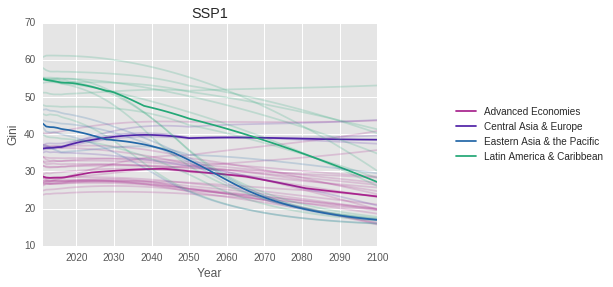

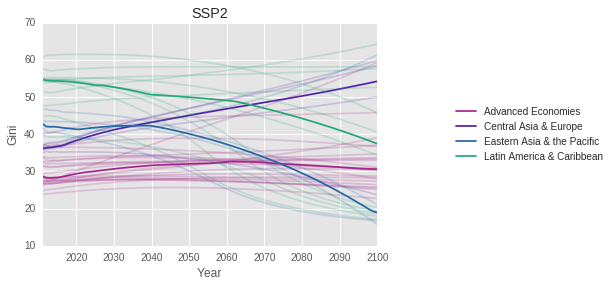

In [38]:
pregions = sorted(set(pdf.Region))
for ssp in sorted(set(pdf.index.values))[:2]:
    # all lines
    g = sns.tsplot(data=pdf.loc[ssp],
                   value='Gini', time='Year', unit='ISO', condition='Region', color=region_colors, 
                   err_style='unit_traces', estimator=np.median)
    # median with bands
    labels_sorted(g, loc='right', bbox_to_anchor=(1.7, 0.5))
    sns.plt.title(ssp)
    plt.show()
    plt.clf()

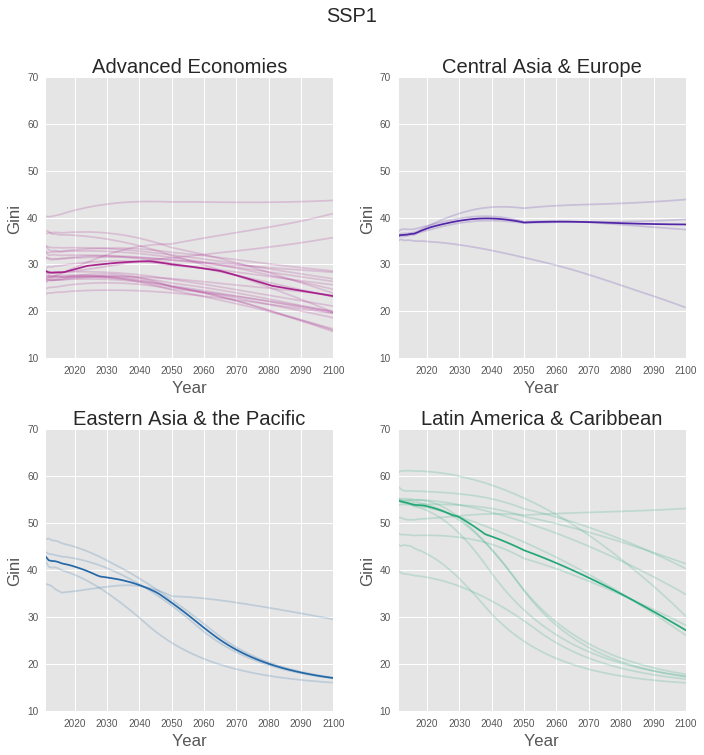

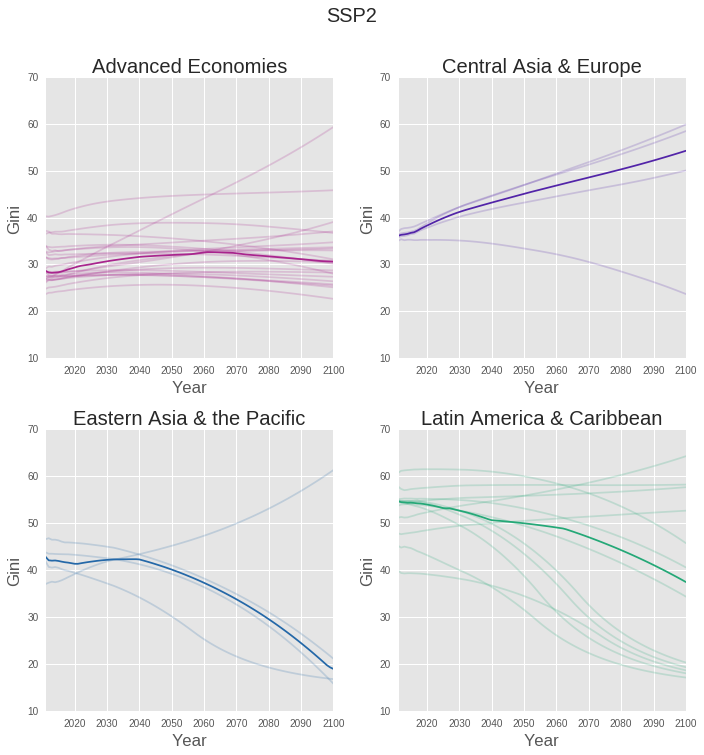

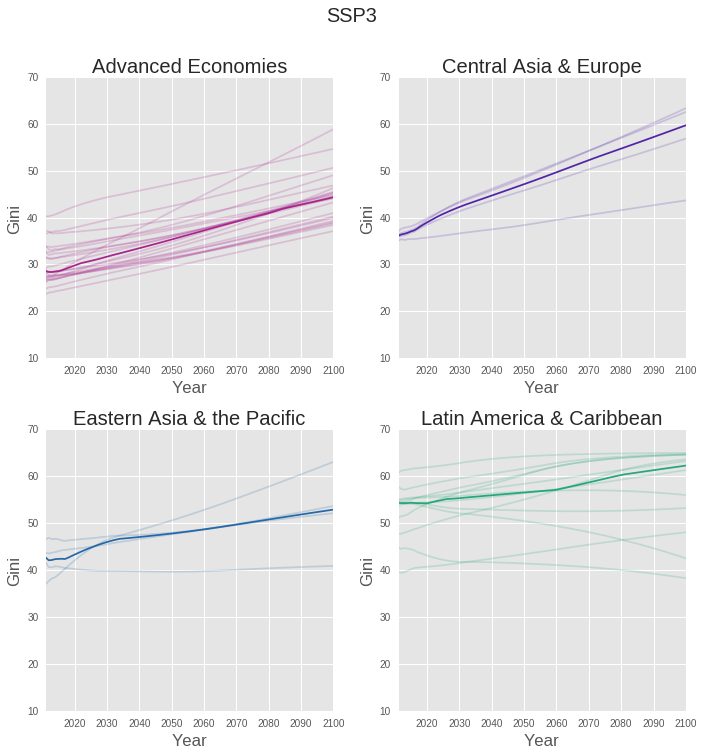

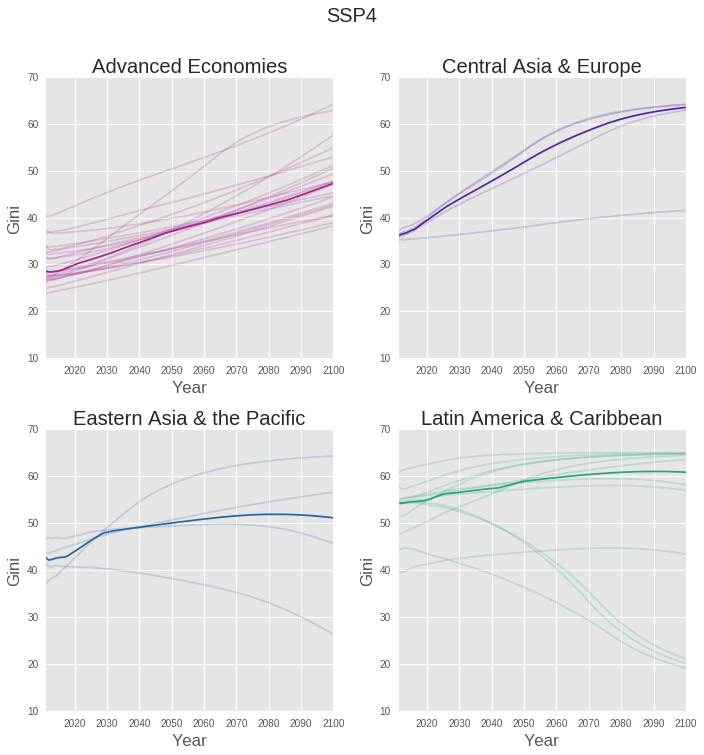

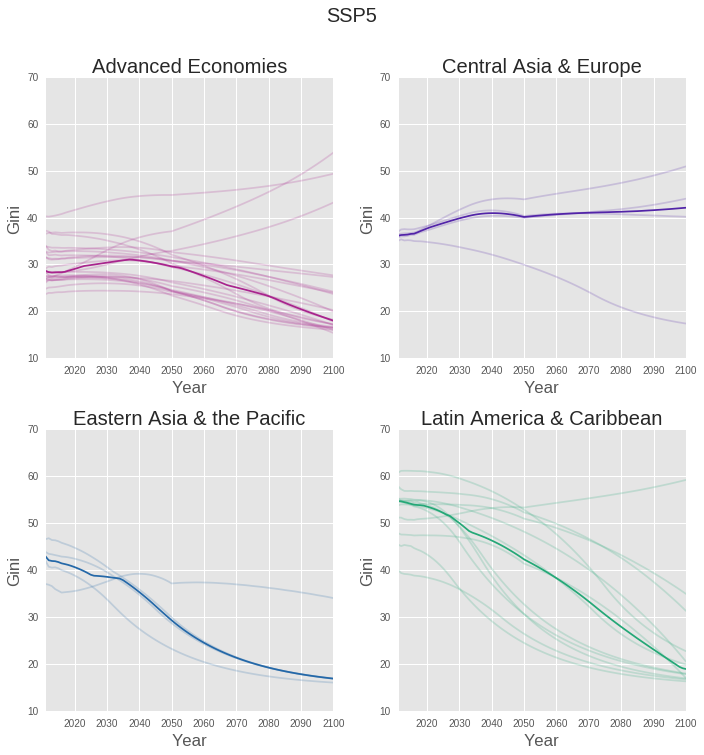

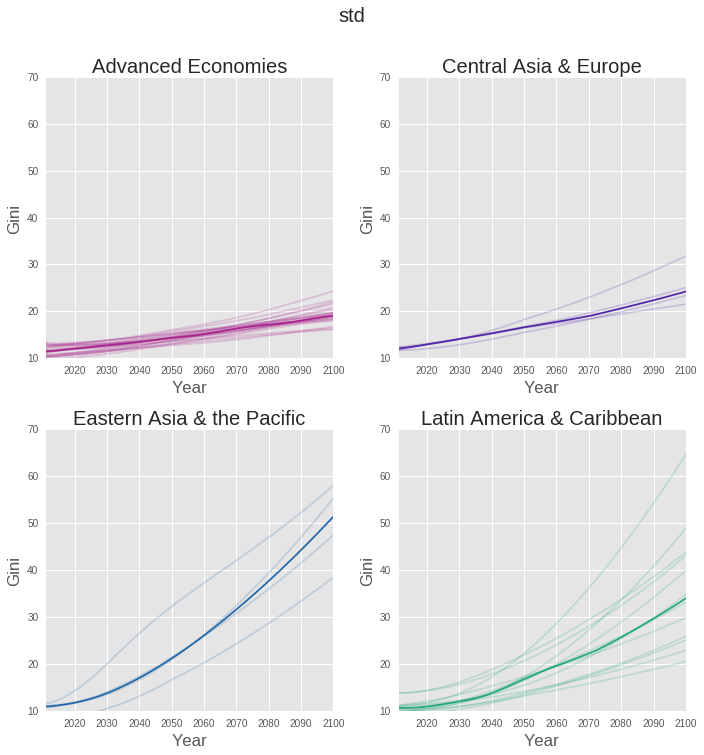

In [39]:
pregions = sorted(set(pdf.Region))
plt.rcParams.update({'font.size': 14})
for ssp in sorted(set(pdf.index.values)):
    # all lines
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    for ax, reg in zip(axs.ravel(), pregions):
        data = pdf.loc[ssp]
        data = data[data.Region == reg]
        g = sns.tsplot(data=data,
                       value='Gini', time='Year', unit='ISO', condition='Region', color=region_colors, 
                       err_style='unit_traces', estimator=np.median,
                       ax=ax, legend=False)
        ax.set_title(reg)
        ax.set_ylim(10, 70)
    title = fig.suptitle(ssp, fontsize=20, y=1.05)
    plt.tight_layout()
    plt.savefig('50_{}.png'.format(ssp), dpi=300, bbox_inches='tight', bbox_extra_artists=[title])
    plt.show()
    plt.clf()

In [40]:
pregions = sorted(set(pdf.Region))
plt.rcParams.update({'font.size': 14})
for ssp in sorted(set(pdf.index.values)):
    # all lines
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    for ax, reg in zip(axs.ravel(), pregions):
        data = pdf.loc[ssp]
        data = data[data.Region == reg]
        g = sns.tsplot(data=data,
                       value='Gini', time='Year', unit='ISO', condition='Region', color=region_colors, 
                       err_style='unit_traces', estimator=np.median,
                       ax=ax, legend=False)
        ax.set_title(reg)
        ax.set_ylim(10, 70)
    title = fig.suptitle(ssp, fontsize=20, y=1.05)
    plt.tight_layout()
    plt.savefig('50_{}.png'.format(ssp), dpi=300, bbox_inches='tight', bbox_extra_artists=[title])
    plt.show()
    plt.clf()

Year                           2100
ISO                             USA
Gini                         64.662
Region    Latin America & Caribbean
dtype: object

# Regressed Ginis

In [9]:
rdf = pd.read_csv('../econ/nbs/data/projected_ginis_full.csv', index_col=[0, 1])
rdf.columns.name = 'iso'
rdf = rdf.stack().reset_index()
common_isos = set(mapping.index.values).intersection(set(rdf['iso']))
rdf = rdf[rdf.iso.isin(common_isos)]
rdf['region'] = rdf['iso'].apply(lambda i: mapping.loc[i])
rdf = rdf[~rdf.region.isnull()]
rdf.head()

,scenario,year,iso,0,region
0,SSP1,2011,ABW,49.278088,Latin America & Caribbean
1,SSP1,2011,AFG,33.800000,Central Asia & Europe
2,SSP1,2011,AGO,48.720000,Sub-Saharan Africa
3,SSP1,2011,ALB,29.215000,Central Asia & Europe
4,SSP1,2011,ARE,41.480451,Middle East & North Africa


In [10]:
rdf.columns = ['Scenario', 'Year', 'ISO', 'Gini', 'Region']
rdf = rdf.set_index('Scenario')
rdf.head()

,Year,ISO,Gini,Region
Scenario,,,,
SSP1,2011,ABW,49.278088,Latin America & Caribbean
SSP1,2011,AFG,33.800000,Central Asia & Europe
SSP1,2011,AGO,48.720000,Sub-Saharan Africa
SSP1,2011,ALB,29.215000,Central Asia & Europe
SSP1,2011,ARE,41.480451,Middle East & North Africa


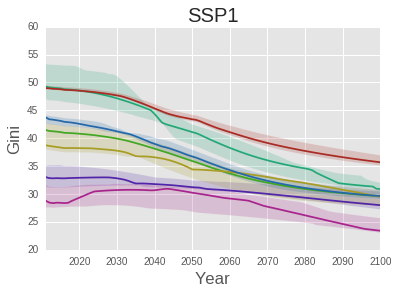

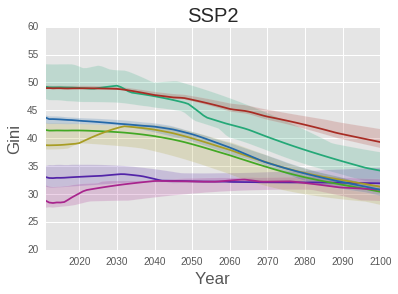

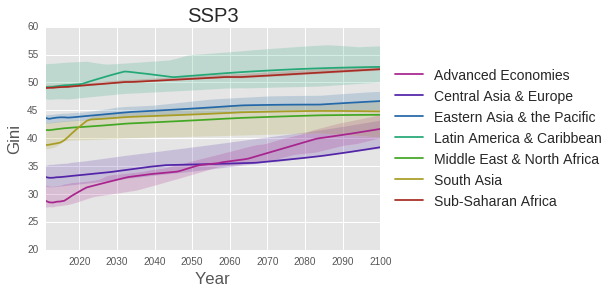

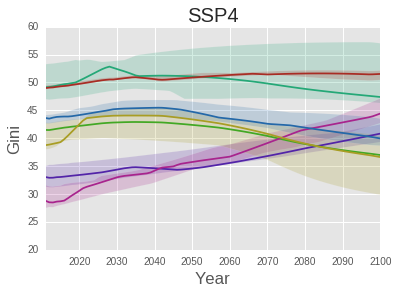

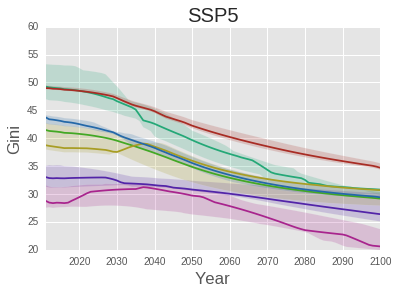

In [11]:
for ssp in sorted(set(rdf.index.values)):
    data = rdf.loc[ssp]
    g = sns.tsplot(data=data, 
                   value='Gini', time='Year', unit='ISO', condition='Region', color=region_colors, 
                   estimator=np.median)
    if ssp == 'SSP3':
        leg = labels_sorted(g, loc='right', bbox_to_anchor=(1.7, 0.5), fontsize=14)
    else:
        g.legend_.remove()
    g.set_ylim(20, 60)
    sns.plt.title(ssp)
    extras = [leg] if ssp == 'SSP3' else []
    plt.savefig('all_{}.png'.format(ssp), dpi=300, bbox_inches='tight', bbox_extra_artists=extras)
    plt.show()
    plt.clf()

# Medians of Projected Values

In [113]:
mdf = pdf.reset_index()
#mdf = mdf[mdf.Region != 'Central Asia & Europe']
mdf['Region'][mdf.ISO == 'IND'] = 'Eastern Asia & the Pacific' # add india to eastern asia
mdf.head()

/home/gidden/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Scenario,Year,ISO,Gini,Region
0,SSP1,2011,AUT,26.106634,Advanced Economies
1,SSP1,2011,BEL,27.500149,Advanced Economies
2,SSP1,2011,BGR,36.457249,Central Asia & Europe
3,SSP1,2011,BLR,36.966496,Central Asia & Europe
4,SSP1,2011,BOL,54.783241,Latin America & Caribbean


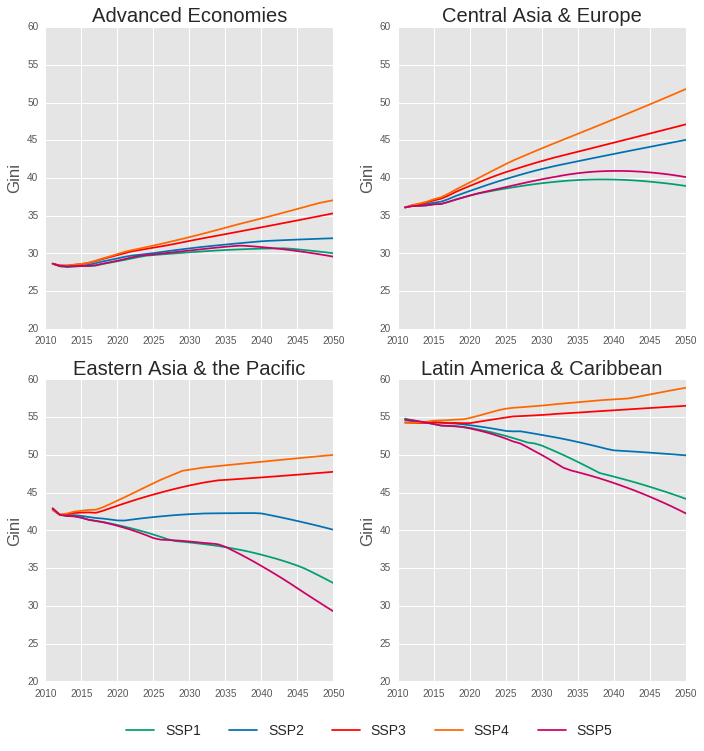

In [114]:
mregions = sorted(set(mdf.Region))
plt.rcParams.update({'font.size': 14})
data = mdf[mdf.Scenario != 'std']
data = data.groupby(['Region', 'Scenario', 'Year']).median()

colors = ["#009E73", "#0072B2", "#FF0000", "#FF6600", "#CC0066"]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for ax, reg in zip(axs.ravel(), mregions):
    data.loc[reg].unstack('Scenario').plot(ax=ax, legend=False, color=colors)
    ax.set_title(reg)
    ax.set_ylim(20, 60)
    ax.set_xlim(2010, 2050)
    ax.set_ylabel('Gini')
    ax.set_xlabel('')
handles, labels = ax.get_legend_handles_labels()
labels = sorted(set(mdf.Scenario))
legend = plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(-.1,-0.1),
          fontsize=14, ncol=5)
plt.tight_layout()
plt.savefig('medians.png'.format(ssp), dpi=300, bbox_inches='tight', bbox_extra_artists=[legend])
plt.show()
plt.clf()

# Medians with Std

In [106]:
std = mdf[mdf.Scenario == 'std']
std.Gini = std.Gini ** 2 # var
std = (std).groupby(['Region', 'Year']).mean() ** 0.5
std = std.reset_index().set_index('Region')
std.head(2)

,Year,Gini
Region,,
Advanced Economies,2011,11.561160
Advanced Economies,2012,11.635725


In [107]:
data = mdf[mdf.Scenario.isin(ssps)]
grp = data.groupby(['Region', 'Scenario', 'Year'])
data = grp.median()
data['gini_mean'] = grp.mean()
data = data.reset_index().set_index(['Scenario', 'Region'])
data.head(2)

Year       Gini  gini_mean
Scenario Region                                        
SSP1     Advanced Economies  2011  28.662433  30.090290
         Advanced Economies  2012  28.317304  30.011656

/home/gidden/.local/lib/python2.7/site-packages/ipykernel/__main__.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.


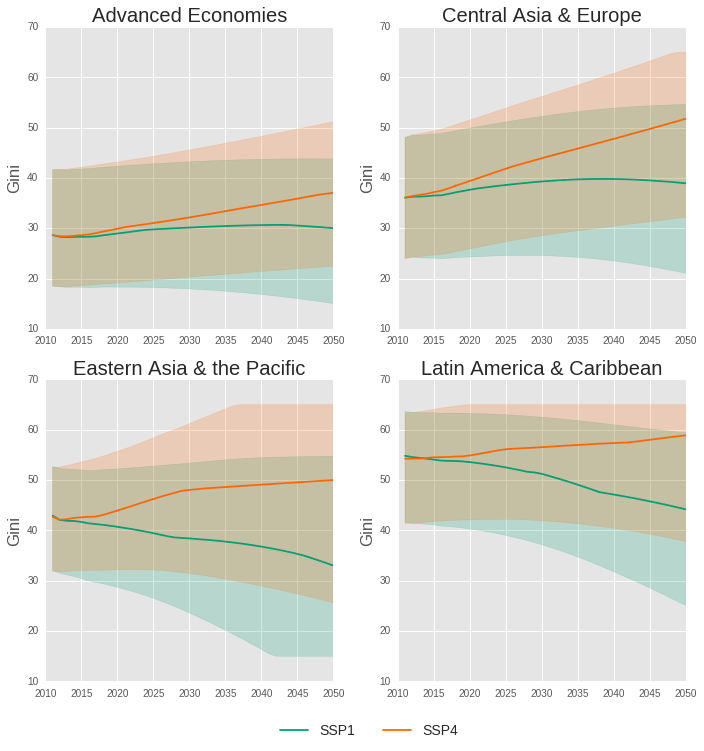

In [112]:
ssps = ['SSP1', 'SSP4']
plt.rcParams.update({'font.size': 14})

#colors = ["#009E73", "#0072B2", "#D55E00", "#E69F00", "#CC0066"]
scolors = [colors[0], colors[3]]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for ax, reg in zip(axs.ravel(), mregions):
    s = std.loc[reg]
    for c, ssp in enumerate(ssps):
        d = data.loc[(ssp, reg)]
        ax.plot(d.Year, d.Gini, c=scolors[c])
        lb = pd.Series(d.gini_mean.values - s.Gini.values).apply(lambda x: max(x, 15))
        ub = pd.Series(d.gini_mean.values + s.Gini.values).apply(lambda x: min(x, 65))
        ax.fill_between(d.Year, lb, ub, alpha=.2, color=scolors[c])
    #data.loc[reg].unstack('Scenario').plot(ax=ax, legend=False, color=colors)
    ax.set_title(reg)
    ax.set_ylim(10, 70)
    ax.set_xlim(2010, 2050)
    ax.set_ylabel('Gini')
    ax.set_xlabel('')
handles, labels = ax.get_legend_handles_labels()
labels = sorted(ssps)
legend = plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(-.1,-0.1),
          fontsize=14, ncol=5)
plt.tight_layout()
plt.savefig('stds.png'.format(ssp), dpi=300, bbox_inches='tight', bbox_extra_artists=[legend])
plt.show()
plt.clf()

In [42]:
mregions

['Advanced Economies',
 'Eastern Asia & the Pacific',
 'Latin America & Caribbean',
 'South Asia']

In [41]:
mdf.head()
std = 

,Scenario,Year,ISO,Gini,Region
0,SSP1,2011,AUT,26.106634,Advanced Economies
1,SSP1,2011,BEL,27.500149,Advanced Economies
4,SSP1,2011,BOL,54.783241,Latin America & Caribbean
5,SSP1,2011,BRA,57.863876,Latin America & Caribbean
6,SSP1,2011,CAN,28.814909,Advanced Economies
